In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('C:/Users/athar/OneDrive - University of Hertfordshire/projects/walmart analysis/train.csv')
df_test = pd.read_csv('C:/Users/athar/OneDrive - University of Hertfordshire/projects/walmart analysis/test.csv')
df_features = pd.read_csv('C:/Users/athar/OneDrive - University of Hertfordshire/projects/walmart analysis/features.csv')
df_stores = pd.read_csv('C:/Users/athar/OneDrive - University of Hertfordshire/projects/walmart analysis/stores.csv')

In [3]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
print(df_train.shape)
print(df_test.shape)
print(df_features.shape)
print(df_stores.shape)

(421570, 5)
(115064, 4)
(8190, 12)
(45, 3)


In [8]:
print(pd.isnull(df_train).sum())
print(pd.isnull(df_test).sum())
print(pd.isnull(df_features).sum())
print(pd.isnull(df_stores).sum())


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64
Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64
Store    0
Type     0
Size     0
dtype: int64


In [9]:
df = df_train.merge(df_features, how = 'left', indicator= True).merge(df_stores, how='left')

In [10]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,_merge,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,both,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,both,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,both,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,both,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,both,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,both,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,both,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,both,B,118221


In [11]:
df2 = df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','_merge'], axis =1)

In [12]:
df2

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221


In [13]:
df2.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [14]:
df2.loc[df2['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,182.318780,8.743,B,118221


In [15]:
df3 = df2.loc[df2['Weekly_Sales']>0]

In [16]:
df3

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221


In [17]:
df3['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

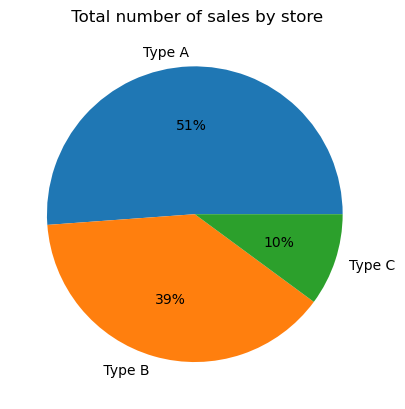

In [18]:
store = ['Type A', ' Type B', 'Type C']
data = df3['Type'].value_counts()

fig, ax = plt.subplots()
plt.pie(data,labels = store, autopct ='%.0f%%')
ax.set_title(' Total number of sales by store')
plt.show()

In [19]:
df3['year'] = pd.DatetimeIndex(df3["Date"]).year
df3['month'] = pd.DatetimeIndex(df3["Date"]).month
df3['week'] = pd.DatetimeIndex(df3["Date"]).week

C:\Users\athar\AppData\Local\Temp\ipykernel_17132\1770048228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['year'] = pd.DatetimeIndex(df3["Date"]).year
C:\Users\athar\AppData\Local\Temp\ipykernel_17132\1770048228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['month'] = pd.DatetimeIndex(df3["Date"]).month
C:\Users\athar\AppData\Local\Temp\ipykernel_17132\1770048228.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which ret

In [20]:
df3

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010,2,6
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010,2,7
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010,2,8
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221,2012,9,39
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221,2012,10,40
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221,2012,10,41
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221,2012,10,42


                 Store      Dept  Weekly_Sales  IsHoliday  Temperature  \
Store         1.000000  0.024258     -0.085117  -0.000522    -0.050230   
Dept          0.024258  1.000000      0.148749   0.000663     0.004727   
Weekly_Sales -0.085117  0.148749      1.000000   0.012843    -0.002339   
IsHoliday    -0.000522  0.000663      0.012843   1.000000    -0.155775   
Temperature  -0.050230  0.004727     -0.002339  -0.155775     1.000000   
Fuel_Price    0.065321  0.003544      0.000089  -0.078155     0.143700   
CPI          -0.211261 -0.007178     -0.021162  -0.001933     0.182223   
Unemployment  0.208759  0.007787     -0.025806   0.010555     0.096768   
Size         -0.182763 -0.002491      0.244117   0.000797    -0.058413   
year          0.002831  0.003716     -0.010015  -0.056572     0.065712   
month         0.000907  0.000800      0.028401   0.123058     0.235957   
week          0.000926  0.000767      0.027659   0.127846     0.236256   

              Fuel_Price       CPI  U

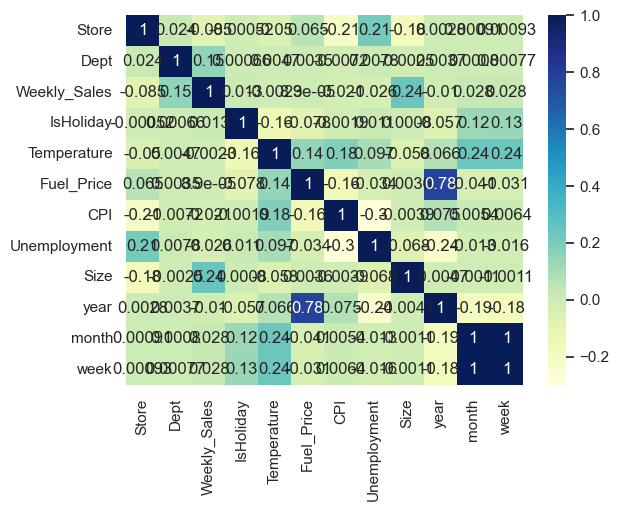

In [21]:
data = df3


print(data.corr())
sns.set_theme(style="whitegrid")
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(25,8)})

plt.show()

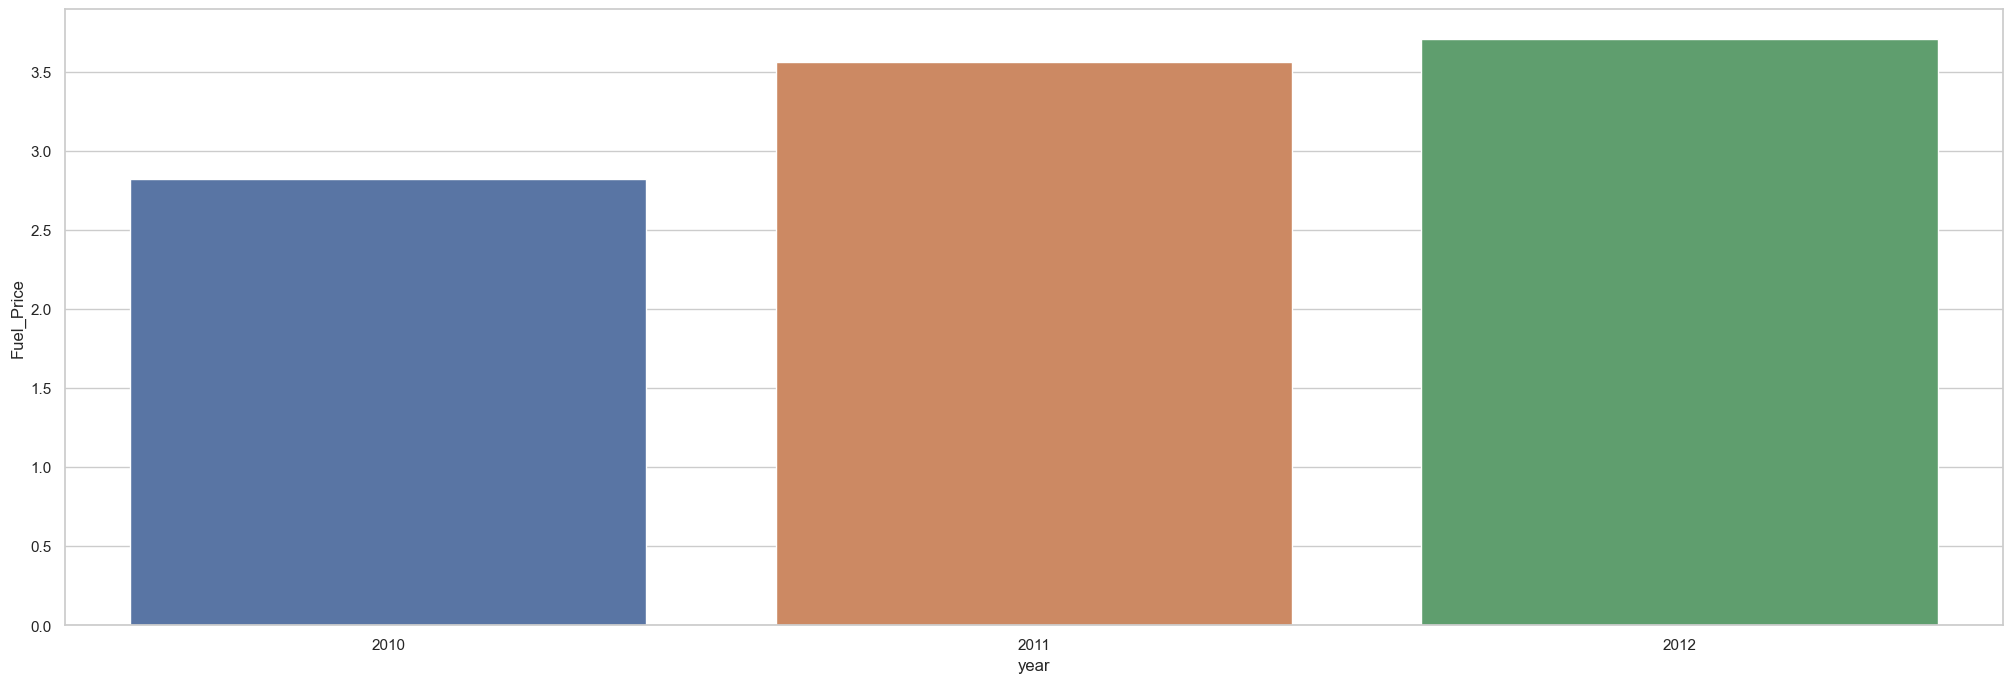

In [22]:
sns.set_theme(style="whitegrid")
tips= df3
ax = sns.barplot(x= 'year', y = 'Fuel_Price', data = tips)
sns.set(rc = {'figure.figsize':(15,4)})

plt.show()

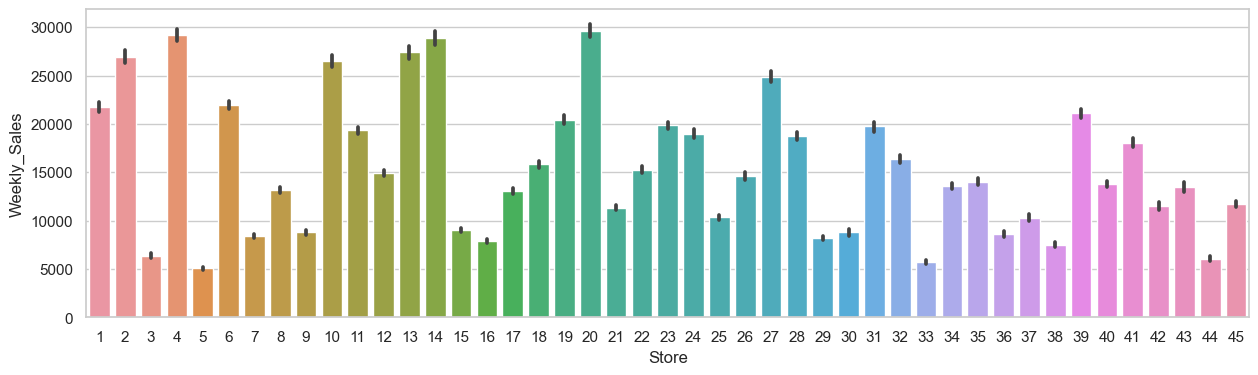

In [23]:
sns.set_theme(style="whitegrid")
tips= df3
ax = sns.barplot(x= 'Store', y = 'Weekly_Sales', data = tips)
sns.set(rc = {'figure.figsize':(15,4)})

plt.show()

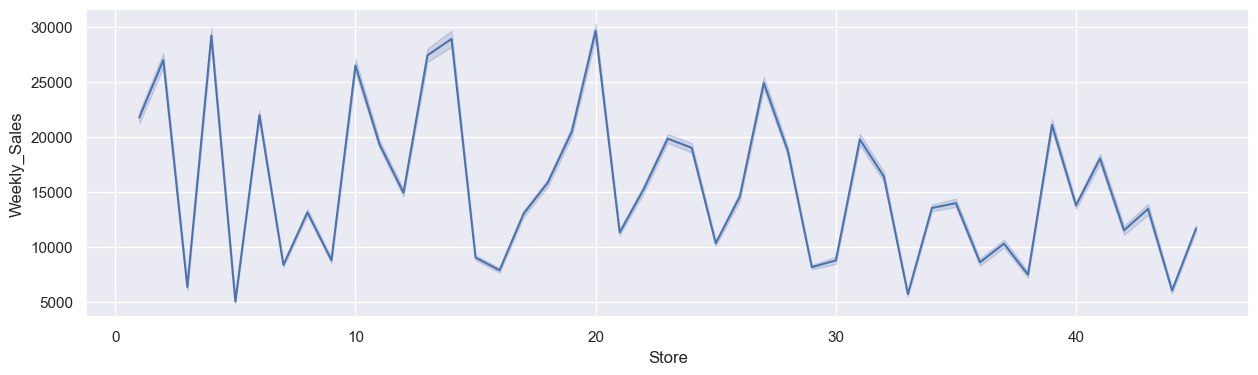

In [24]:
tips= df3
sns.lineplot(x= 'Store', y = 'Weekly_Sales', data = tips)
plt.show()

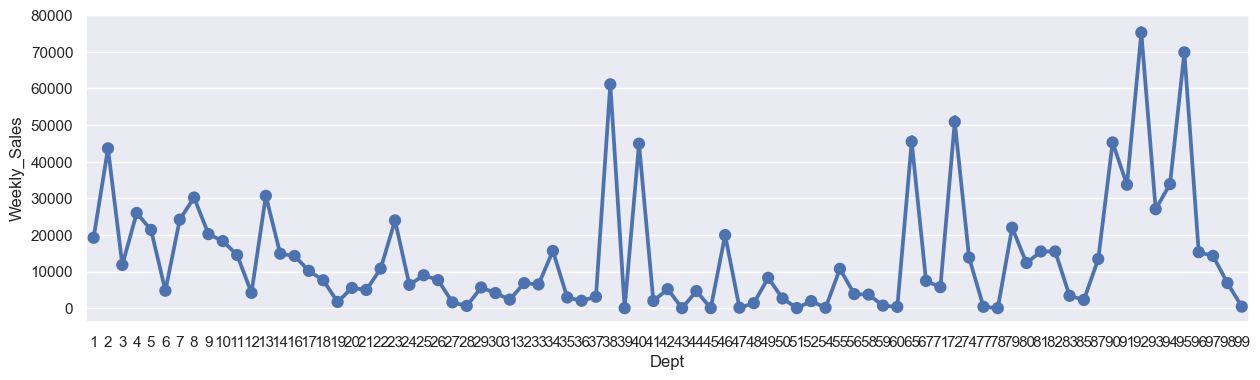

In [25]:
tips= df3
sns.pointplot(x= 'Dept', y = 'Weekly_Sales', data = tips)
sns.set(rc = {'figure.figsize':(30,8)})
plt.show()

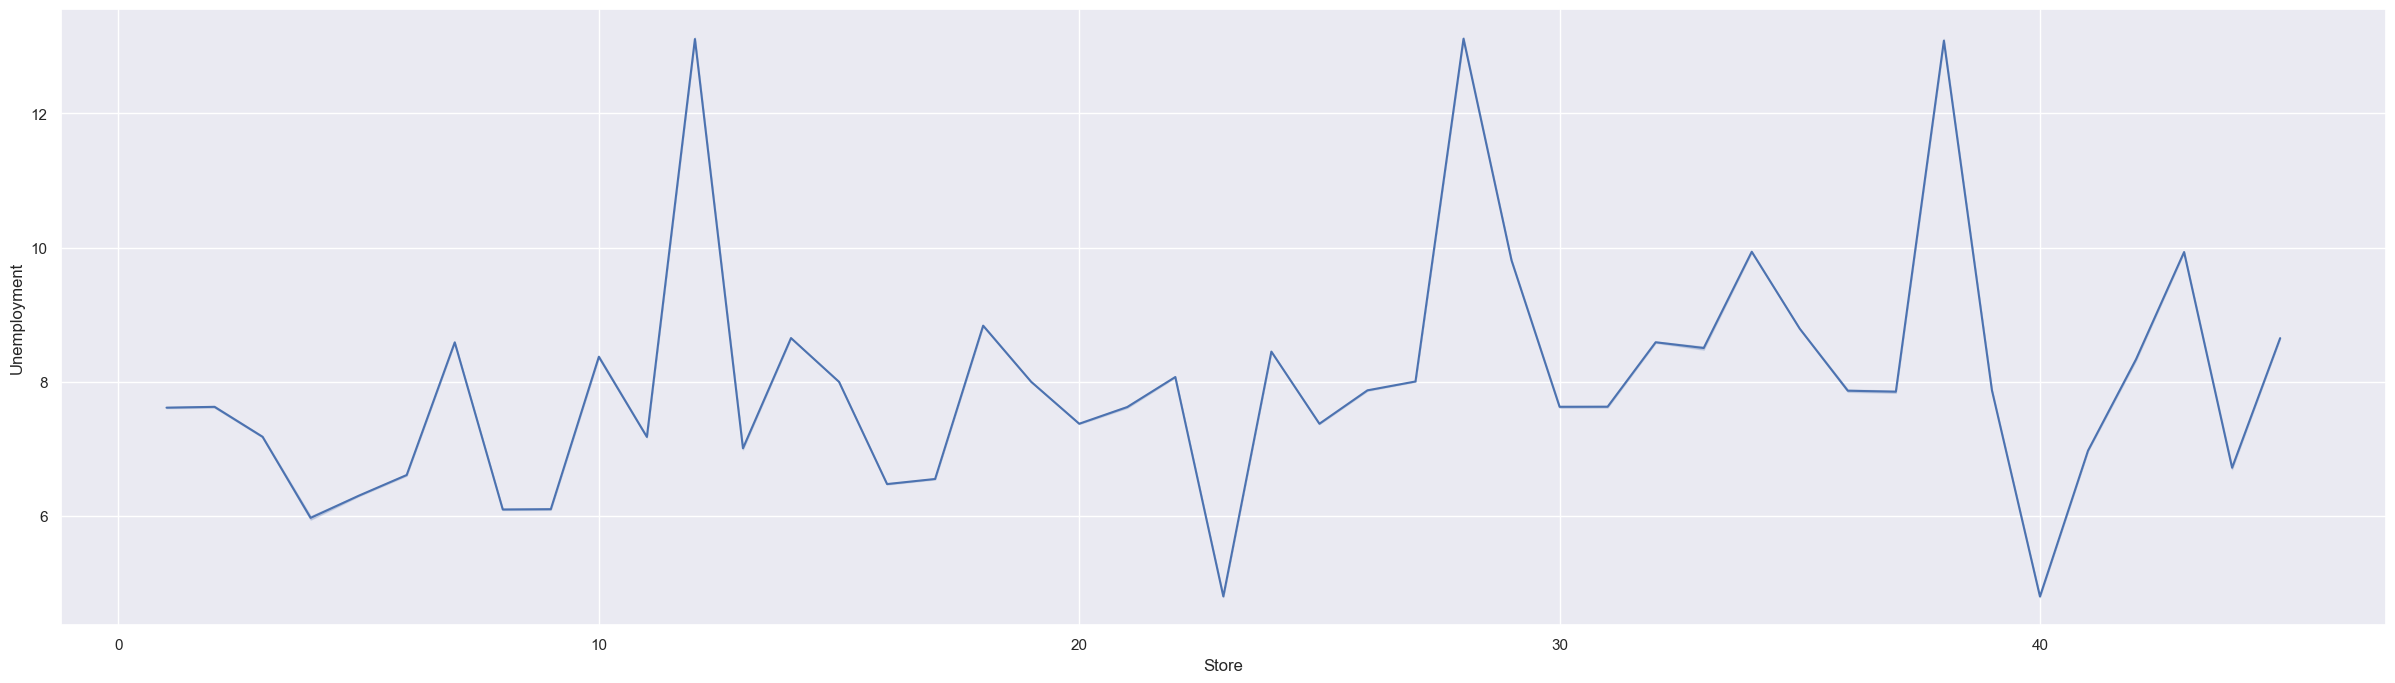

In [26]:
tips= df3
sns.lineplot(x= 'Store', y = 'Unemployment', data = tips)
sns.set(rc = {'figure.figsize':(30,8)})
plt.show()

<AxesSubplot:xlabel='month'>

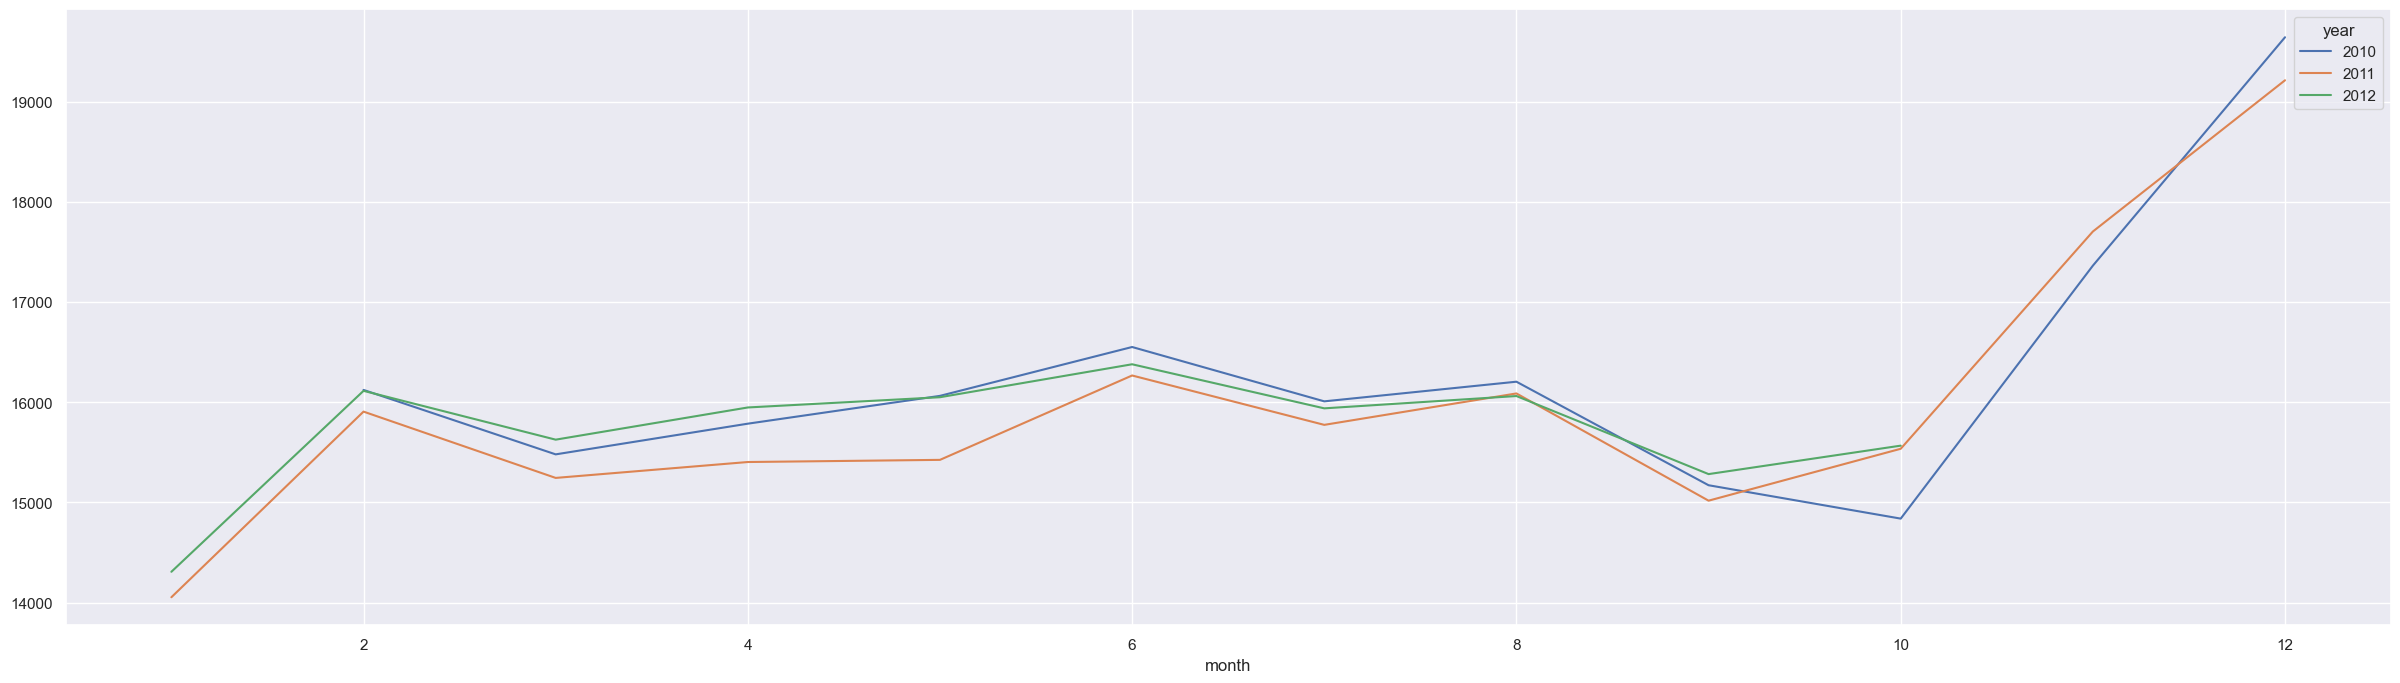

In [27]:
month_wise_sale = pd.pivot_table(df3, values='Weekly_Sales', columns = 'year', index= 'month')
month_wise_sale.plot()

In [28]:
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()
df3['IsHoliday']= label_encoder.fit_transform(df3['IsHoliday'])
df3['Type']= label_encoder.fit_transform(df3['Type'])
df3


C:\Users\athar\AppData\Local\Temp\ipykernel_17132\3641212782.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['IsHoliday']= label_encoder.fit_transform(df3['IsHoliday'])
C:\Users\athar\AppData\Local\Temp\ipykernel_17132\3641212782.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Type']= label_encoder.fit_transform(df3['Type'])


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,0,151315,2010,2,5
1,1,1,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106,0,151315,2010,2,6
2,1,1,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106,0,151315,2010,2,7
3,1,1,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106,0,151315,2010,2,8
4,1,1,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106,0,151315,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,64.88,3.997,192.013558,8.684,1,118221,2012,9,39
421566,45,98,2012-10-05,628.10,0,64.89,3.985,192.170412,8.667,1,118221,2012,10,40
421567,45,98,2012-10-12,1061.02,0,54.47,4.000,192.327265,8.667,1,118221,2012,10,41
421568,45,98,2012-10-19,760.01,0,56.47,3.969,192.330854,8.667,1,118221,2012,10,42


In [29]:
df4=df3.drop(['Date'],axis=1)

In [30]:
df4

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,0,151315,2010,2,5
1,1,1,46039.49,1,38.51,2.548,211.242170,8.106,0,151315,2010,2,6
2,1,1,41595.55,0,39.93,2.514,211.289143,8.106,0,151315,2010,2,7
3,1,1,19403.54,0,46.63,2.561,211.319643,8.106,0,151315,2010,2,8
4,1,1,21827.90,0,46.50,2.625,211.350143,8.106,0,151315,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,64.88,3.997,192.013558,8.684,1,118221,2012,9,39
421566,45,98,628.10,0,64.89,3.985,192.170412,8.667,1,118221,2012,10,40
421567,45,98,1061.02,0,54.47,4.000,192.327265,8.667,1,118221,2012,10,41
421568,45,98,760.01,0,56.47,3.969,192.330854,8.667,1,118221,2012,10,42


In [31]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor


In [32]:
Features=df4.drop(['Weekly_Sales'],axis=1)
Target=df4['Weekly_Sales']

In [33]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(Features,Target)

RandomForestRegressor()

In [35]:
df4

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,0,151315,2010,2,5
1,1,1,46039.49,1,38.51,2.548,211.242170,8.106,0,151315,2010,2,6
2,1,1,41595.55,0,39.93,2.514,211.289143,8.106,0,151315,2010,2,7
3,1,1,19403.54,0,46.63,2.561,211.319643,8.106,0,151315,2010,2,8
4,1,1,21827.90,0,46.50,2.625,211.350143,8.106,0,151315,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,64.88,3.997,192.013558,8.684,1,118221,2012,9,39
421566,45,98,628.10,0,64.89,3.985,192.170412,8.667,1,118221,2012,10,40
421567,45,98,1061.02,0,54.47,4.000,192.327265,8.667,1,118221,2012,10,41
421568,45,98,760.01,0,56.47,3.969,192.330854,8.667,1,118221,2012,10,42


In [34]:
Features

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,0,42.31,2.572,211.096358,8.106,0,151315,2010,2,5
1,1,1,1,38.51,2.548,211.242170,8.106,0,151315,2010,2,6
2,1,1,0,39.93,2.514,211.289143,8.106,0,151315,2010,2,7
3,1,1,0,46.63,2.561,211.319643,8.106,0,151315,2010,2,8
4,1,1,0,46.50,2.625,211.350143,8.106,0,151315,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,0,64.88,3.997,192.013558,8.684,1,118221,2012,9,39
421566,45,98,0,64.89,3.985,192.170412,8.667,1,118221,2012,10,40
421567,45,98,0,54.47,4.000,192.327265,8.667,1,118221,2012,10,41
421568,45,98,0,56.47,3.969,192.330854,8.667,1,118221,2012,10,42


<BarContainer object of 12 artists>

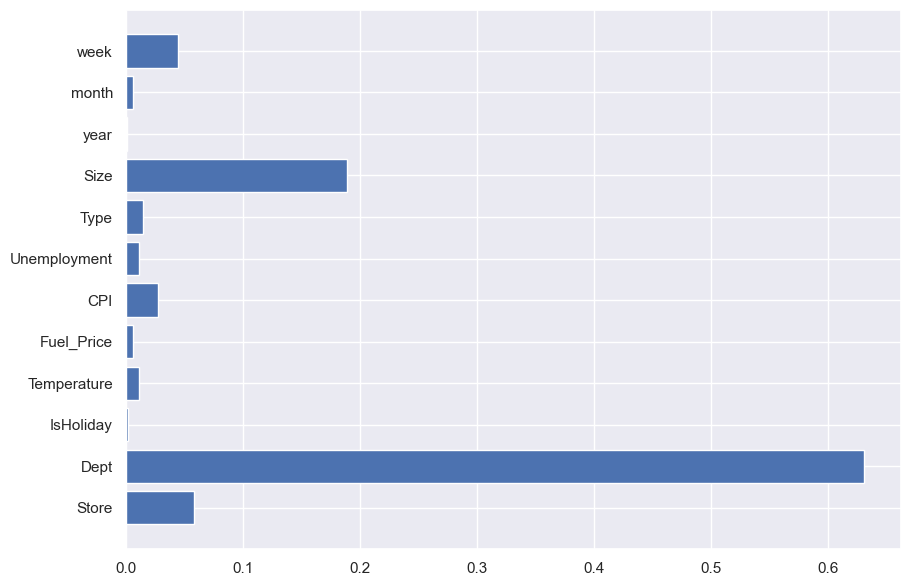

In [36]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.barh(Features.columns, rf.feature_importances_)

In [37]:
F= Features.drop(['IsHoliday','year'],axis=1)

In [38]:
F

,Store,Dept,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,month,week
0,1,1,42.31,2.572,211.096358,8.106,0,151315,2,5
1,1,1,38.51,2.548,211.242170,8.106,0,151315,2,6
2,1,1,39.93,2.514,211.289143,8.106,0,151315,2,7
3,1,1,46.63,2.561,211.319643,8.106,0,151315,2,8
4,1,1,46.50,2.625,211.350143,8.106,0,151315,3,9
...,...,...,...,...,...,...,...,...,...,...
421565,45,98,64.88,3.997,192.013558,8.684,1,118221,9,39
421566,45,98,64.89,3.985,192.170412,8.667,1,118221,10,40
421567,45,98,54.47,4.000,192.327265,8.667,1,118221,10,41
421568,45,98,56.47,3.969,192.330854,8.667,1,118221,10,42


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test= train_test_split(F,Target, test_size= 0.25, random_state=0)

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [44]:
DTRmodel = DecisionTreeRegressor(max_depth=3,random_state=0)
DTRmodel.fit(x_train,y_train)
y_pred = DTRmodel.predict(x_test)

In [45]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))

R2 score  : 0.3796166061691
MSE score  : 323184793.8287025
RMSE:  17977.34112233237


In [47]:
rf1 = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35, 
                            max_features = 'sqrt',min_samples_split = 10)
rf1.fit(x_train,y_train)
y_pred1 = rf1.predict(x_test)

In [48]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred1))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred1)))

R2 score  : 0.3796166061691
MSE score  : 62845166.705938146
RMSE:  7927.494352311968


In [50]:
!pip install xgboost

     ---------------------------------------- 99.7/99.7 MB 6.6 MB/s eta 0:00:00


In [51]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [52]:
y_pred2 = model.predict(x_test)

In [53]:
y_pred2 

array([25002.686 ,  -639.3488, 34755.91  , ...,  8618.393 ,  3998.752 ,
        9143.052 ], dtype=float32)

In [54]:
from sklearn.linear_model import Ridge
rr_model = Ridge(alpha=0.5)
rr_model.fit(x_train,y_train)

Ridge(alpha=0.5)

In [55]:
y_pred3 = model.predict(x_test)

In [57]:
y_pred3

array([25002.686 ,  -639.3488, 34755.91  , ...,  8618.393 ,  3998.752 ,
        9143.052 ], dtype=float32)

In [58]:
print("R2 score  :",r2_score(y_test, y_pred3))
print("MSE score  :",mean_squared_error(y_test, y_pred3))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred3)))

R2 score  : 0.9466950355211992
MSE score  : 27768883.123624183
RMSE:  5269.618878403275


In [59]:
y_test

198556    18526.46
342491       84.00
267645    27025.56
169044    48324.54
45102      2968.68
            ...   
323292     4156.69
22041     15252.97
261294     8461.31
212048      835.99
406506     6728.27
Name: Weekly_Sales, Length: 105053, dtype: float64